## Hydrogen Atom Screened Potential:

In [29]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

Defining Constant:

In [30]:
# Given variable values in S.I. units
e=1 # Electronic charge 
k = 14.4195 # Coulumbs constant
h_cross = 1973 # Planck's constant cross
h=(2 * np.pi)*h_cross # Planck's constant
m=0.511e6 # Reduced mass of system
arm = 1 # to adjust length 

In [31]:
a = [3,5,7]*arm; # Different a values
rmin=1e-10*arm; rmax=10*arm; # Position of wall along x-axis

n= 500 # no. of points
f = 20
nf = int(n/f)
r = np.linspace(rmin,rmax,n) # n numbers b/w rmin and rmax
r_alt = np.linspace(rmin,rmax/f,nf)
d = r[2]-r[1]

Potential and Kinetic Energy Matrix

Ground state energy for a=3 m is -0.48581414978426085 eV


<Figure size 1200x800 with 0 Axes>

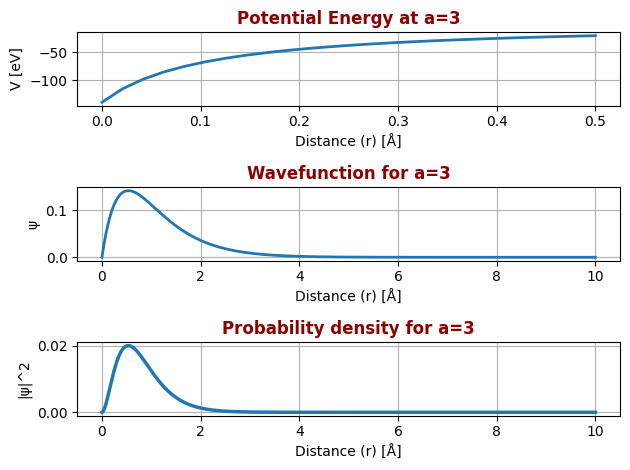

Ground state energy for a=5 m is -1.2770080160360058 eV


<Figure size 1200x800 with 0 Axes>

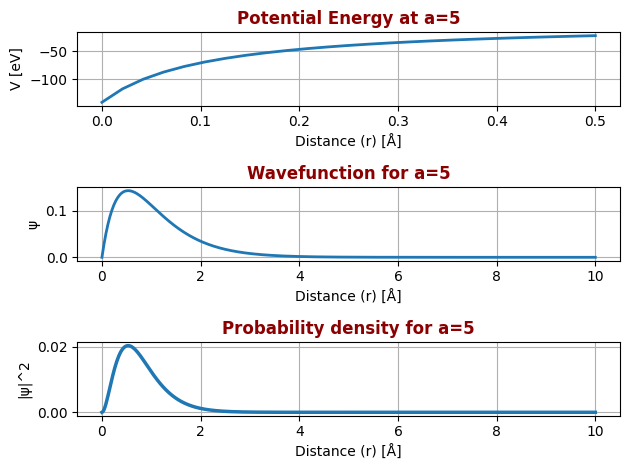

Ground state energy for a=7 m is -1.7525167102695665 eV


<Figure size 1200x800 with 0 Axes>

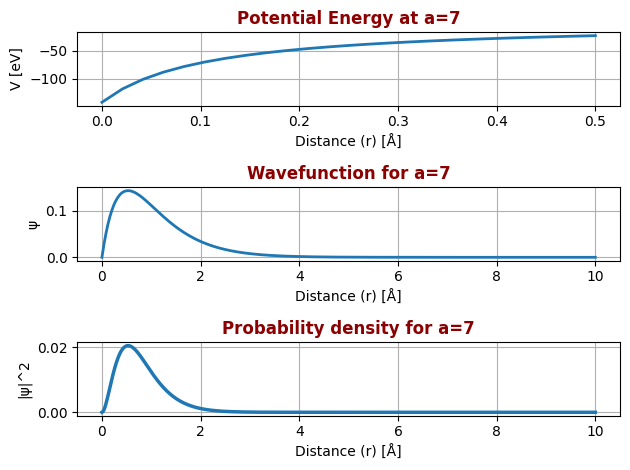

In [32]:
for z in range(len(a)):
  # Kinetic Energy
  A = (-2)*np.eye(n)
  for i in range(n-1):
    A[i+1,i] = A[i,i+1] = 1
  K = (-(h_cross**2)/(2*m*d**2))*A

  # Potential Energy
  V = np.zeros((n,n))
  for i in range(n):
    V[i,i] = -((k*e**2)/r[i])*np.exp(-r[i]/a[z])
  Vbar = np.diag(V)[5:]
  VPlot = Vbar[0:nf]

  # Hamiltonian Matrix
  H = K+V

  # Finding Eigenvalues and Eigenvectors
  E,X = sci.linalg.eig(H)
  E = E.real ; X = X.real

  # Sort eigenvalues and eigenvectors
  idx = E.argsort()
  E = E[idx]
  X = X[:, idx]

  # Probability density matrix
  P = X**2

  energy = E[2]/e
  print(f'Ground state energy for a={a[z]} m is {energy} eV')

  plt.figure(a[z],figsize=(12,8))
  fig,ax = plt.subplots(3,1)
  # Potential Energy
  ax[0].plot(r_alt,VPlot,linewidth=2)
  ax[0].grid()
  ax[0].set_xlabel('Distance (r) [Å]')
  ax[0].set_ylabel('V [eV]')
  ax[0].set_title('Potential Energy at a={}'.format(a[z]),fontsize=12,fontweight=750, color='darkred',pad=6)
  # Wavefunction
  ax[1].plot(r, X[:, 1], linewidth=2)
  ax[1].set_xlabel('Distance (r) [Å]')
  ax[1].set_ylabel('ψ')
  ax[1].set_title(f'Wavefunction for a={a[z]}', fontsize=12,fontweight=750, color='darkred',pad=6)
  ax[1].grid()
  # Probability Density
  ax[2].plot(r, P[:, 1],linewidth=2.5)
  ax[2].set_xlabel('Distance (r) [Å]')
  ax[2].set_ylabel('|ψ|^2')
  ax[2].set_title(f'Probability density for a={a[z]}', fontsize=12,fontweight=750, color='darkred',pad=6)
  ax[2].grid()
  
  plt.tight_layout()
  plt.show()